<a href="https://colab.research.google.com/github/JatinB22/DataScienceProjects/blob/main/IndianStratupEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sudalairajkumar/indian-startup-funding")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/indian-startup-funding


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset -
def load_and_describe(file_name):
  """ Load the dataset and display basic information about the data for better understanding."""
  try:
    data = pd.read_csv(file_name, encoding='latin-1')
    print(f"Loaded the data {file_name} successfully.")
    #Data description
    print("\nDataset head:")
    display(data.head())
    # Basic information
    print("\nBasic information:")
    display(data.info())
    # Skewness
    print("\nSkewness:")
    print(data.skew(numeric_only=True))
    # Kurtosis
    print("\nKurtosis")
    print(data.kurt(numeric_only=True))
    return data
  except Exception as e:
    print(f"Error loading the dataset: {e}")
    return None

In [ ]:
# Calling the function to load the data -
df = load_and_describe('/kaggle/input/indian-startup-funding/startup_funding.csv')

Loaded the data /kaggle/input/indian-startup-funding/startup_funding.csv successfully.

Dataset head:


,ï»¿Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN



Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ï»¿Sr No           3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


None


Skewness:
ï»¿Sr No    0.0
dtype: float64

Kurtosis
ï»¿Sr No   -1.2
dtype: float64


In [ ]:
# Checking the shape of the data -
df.shape

(3044, 10)

In [ ]:
# Data Cleaning and preprocessing -
#converting the name of column into lower string and removing unnecessary space b/w them -
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
# Displaying the column names -
df.columns

Index(['ï»¿sr_no', 'date_dd/mm/yyyy', 'startup_name', 'industry_vertical',
       'subvertical', 'city__location', 'investors_name', 'investmentntype',
       'amount_in_usd', 'remarks'],
      dtype='object')

In [ ]:
# Date dd/mm/yyyy	 isn't in the date format and also we need to convert 'Amount in USD' to  numerical column -

# converting it to numerical column -
df['amount_in_usd'] = df['amount_in_usd'].str.replace(',','')
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors = 'coerce')

# converting the date column to date format -
df['date_dd/mm/yyyy'] = pd.to_datetime(df['date_dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

In [ ]:
# Checking the data type after converting -
df.dtypes

,0
ï»¿sr_no,int64
date_dd/mm/yyyy,datetime64[ns]
startup_name,object
industry_vertical,object
subvertical,object
city__location,object
investors_name,object
investmentntype,object
amount_in_usd,float64
remarks,object


In [ ]:
# Checking the No. of misisng value -
print(df.isna().sum())

ï»¿sr_no                0
date_dd/mm/yyyy         8
startup_name            0
industry_vertical     171
subvertical           936
city__location        180
investors_name         24
investmentntype         4
amount_in_usd         979
remarks              2625
dtype: int64


In [ ]:
# Dropping the Sr No.() column and Remarks column(more than 50% values are null) -
df.drop(columns=['remarks' , 'ï»¿sr_no'], inplace = True)

In [ ]:
# Displaying the categorical column  and numerical column present in our  data -
cat = df.select_dtypes(['object'])
cat_columns = cat.columns
print("Categorical columns:" , cat_columns)

num = df.select_dtypes(['int','float'])
num_columns = num.columns
print("Numerical columns:" , num_columns)

Categorical columns: Index(['startup_name', 'industry_vertical', 'subvertical', 'city__location',
       'investors_name', 'investmentntype'],
      dtype='object')
Numerical columns: Index(['amount_in_usd'], dtype='object')


In [ ]:
# Checking unique value in each catgeorical column -

for col in cat_columns:
    print(col, df[col].unique())
    print(" ")

startup_name ['BYJUâ\x80\x99S' 'Shuttl' 'Mamaearth' ... 'Graphene' 'Simplotel'
 'couponmachine.in']
 
industry_vertical ['E-Tech' 'Transportation' 'E-commerce' 'FinTech' 'Fashion and Apparel'
 'Logistics' 'Hospitality' 'Technology' 'E-Commerce' 'Aerospace'
 'B2B-focused foodtech startup' 'Finance' 'Video' 'Gaming' 'Software'
 'Health and wellness' 'Education' 'Food and Beverage'
 'Health and Wellness' 'B2B Marketing' 'Video Games' 'SaaS'
 'Last Mile Transportation' 'Healthcare' 'Customer Service' 'B2B'
 'Consumer Goods' 'Advertising, Marketing' 'IoT' 'Information Technology'
 'Consumer Technology' 'Accounting' 'Retail' 'Customer Service Platform'
 'Automotive' 'EdTech' 'Services' 'Compliance' 'Transport'
 'Artificial Intelligence' 'Tech' 'Health Care' 'Luxury Label'
 'Waste Management Service' 'Deep-Tech' 'Agriculture' 'Energy'
 'Digital Media' 'Saas' 'Automobile' 'Agtech' 'Social Media' 'Fintech'
 'Edtech' 'AI' 'Ecommerce' 'Nanotechnology' 'Services Platform'
 'Travel Tech' 'Online Ed

In [ ]:
# fixing the inconsistency in the 'City' column -

# Step 1: Convert to string, strip whitespaces, lowercase for uniformity
df['city__location'] = df['city__location'].astype(str).str.strip().str.lower()

# Step 2: Fix encoding issues (like '\xc2\xa0')
df['city__location'] = df['city__location'].str.encode('utf-8').str.decode('unicode_escape')

# Step 3: Remove extra symbols, slashes, and split on '/', ',', '&', etc.
df['city__location'] = df['city__location'].str.split(r'[/,&]').str[0].str.strip()

# Step 4: Map common variations to standardized city names
city_map = {
    'bengaluru': 'bangalore',
    'kormangala': 'bangalore',
    'bangalore': 'bangalore',
    'delhi': ' New Delhi',
    'new delhi': 'New Delhi',
    'nw delhi': 'New Delhi',
    'gurgaon': 'gurugram',
    'noida': 'noida',
    'ahemadabad': 'ahmedabad',
    'ahemdabad': 'ahmedabad',
    'bhubneswar': 'bhubaneswar',
    'kolkatta': 'kolkata',
    'sfo': 'san francisco',
    'ny': 'new york',
    'usa': 'us',
    'us': 'us',
    'sfo / bangalore': 'bangalore',
    'pune / dubai': 'pune',
    'pune / us': 'pune',
    'chennai/ singapore': 'chennai',
    'pune / singapore': 'pune',
    '\\xc2\\xa0noida': 'noida',
    '\\xc2\\xa0bangalore': 'bangalore',
    '\\xc2\\xa0mumbai': 'mumbai',
    'mumbai / uk': 'mumbai',
    'mumbai / ny': 'mumbai',
    '\\Xc2\\Xa0Gurgaon' : 'Gurgaon',
    '\\Xc2\\Xa0New Delhi' : 'New Delhi',
    'mumbai / india': 'mumbai',
    'Ã¢Â\xa0Gurgaon' : 'Gurgaon',
    'Ã¢Â\xa0New Delhi' : 'New Delhi',
    '\\Xc2\\Xa0Gurgaon' : 'Gurgaon',
    '\\Xc2\\Xa0New Delhi': 'New Delhi',
    'Â\xa0Gurgaon' : 'Gurgaon',
    'Â\xa0New Delhi' : 'New Delhi',
    'Ã¢Â\xa0Gurgaon' : 'Gurgaon',
    'Ã¢Â\xa0New Delhi' : 'New Delhi',
    'AAAA Gurgaon' : 'Gurgaon',
    'AAAA New Delhi' : 'New Delhi'

    # we can add more mapping if we want
}

df['city__location'] = df['city__location'].replace(city_map)

# Step 5: Optionally, capitalize properly
df['city__location'] = df['city__location'].str.title()

# Apply this only if encoding fix doesn't work
import unicodedata
def clean_text(text):
    try:
        text = unicodedata.normalize('NFKD', str(text))
        return text.encode('ascii', 'ignore').decode('utf-8').strip()
    except:
        return text

df['city__location'] = df['city__location'].apply(clean_text)
df['subvertical'] = df['subvertical'].apply(clean_text)

In [ ]:
# filling the null values -

# 'Industry Vertical' ( Filling it with mode)
df['industry_vertical'] = df['industry_vertical'].fillna(df['industry_vertical'].mode()[0])

# 'SubVertical' (fillng it with unknown)
df['subvertical'] = df['subvertical'].fillna("Unknown")

In [ ]:
# Checking mean/median for 'Amount in USD' -
mean_ = df['amount_in_usd'].mean().round(2)
median_ = df['amount_in_usd'].median()
print("Mean:", mean_)
print("Median:", median_)

# let's  replace it with mean -
df['amount_in_usd'].fillna({'amount_in_usd':mean_}, inplace=True)

Mean: 18429897.27
Median: 1700000.0


In [ ]:
# Also dropping the rest of the null values that we didn't fill -
df.dropna(inplace=True)

In [ ]:
# checking for duplicate values -
duplicate_values = df.duplicated().sum()
print(f"There are {duplicate_values} duplicate values present in the dataset.")

There are 0 duplicate values present in the dataset.


In [ ]:
# Checking value count in each catgeorical column -

for col in cat_columns:
    print(col, df[col].value_counts().sort_values(ascending=False).head(10))
    print(" ")

startup_name startup_name
Swiggy           8
Ola Cabs         7
Toppr            5
Capital Float    5
Paytm            5
Nykaa            5
UrbanClap        5
Grofers          5
Medinfi          5
Flipkart         5
Name: count, dtype: int64
 
industry_vertical industry_vertical
Consumer Internet    712
Technology           309
eCommerce            126
Finance               53
Healthcare            43
ECommerce             37
E-Commerce            24
Logistics             23
Education             18
Food & Beverage       15
Name: count, dtype: int64
 
subvertical subvertical
nan                          637
Online Lending Platform       11
Online Pharmacy                5
Education                      5
Online Lending                 5
Online Food Delivery           4
Online Education Platform      4
Online lending platform        4
Online Learning Platform       4
Food Delivery Platform         4
Name: count, dtype: int64
 
city__location city__location
Bangalore    586
Mumbai       

In [ ]:
# Use describe(include='object') for string-based categorical data:
df.describe(include='object').T

,count,unique,top,freq
startup_name,2036,1673,Swiggy,8
industry_vertical,2036,575,Consumer Internet,712
subvertical,2036,1295,nan,637
city__location,2036,55,Bangalore,586
investors_name,2036,1651,Undisclosed Investors,29
investmentntype,2036,48,Private Equity,1062


In [ ]:
# Displaying statistical measure of the data (mean, median,max.)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date_dd/mm/yyyy,2036,2016-10-20 11:58:35.127701248,2015-01-02 00:00:00,2015-10-26 00:00:00,2016-08-19 00:00:00,2017-08-25 18:00:00,2020-01-13 00:00:00,NaN
amount_in_usd,2036.0,18278866.848232,16000.0,470000.0,1800000.0,8200000.0,3900000000.0,121471002.007974


Outlier Detection and Handling

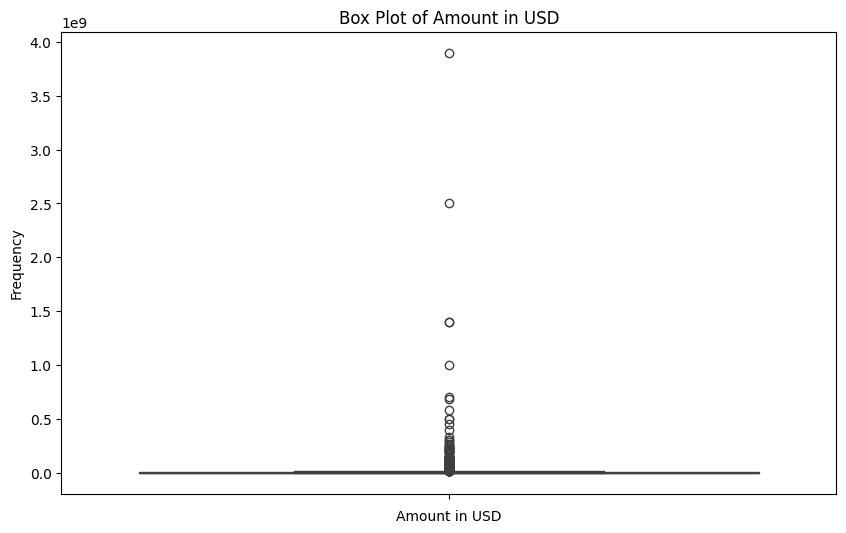

In [ ]:
# Displaying a boxplot to see the outliers present in 'Amount in USD' -
plt.figure(figsize=(10,6))
sns.boxplot(df['amount_in_usd'])
plt.title("Box Plot of Amount in USD")
plt.xlabel("Amount in USD")
plt.ylabel("Frequency") ;

In [ ]:
# outlier detection and treatment -
def outlier_detection_treatment(df, col):
  """ Detects and treats outliers in a specified column using the IQR method."""
  Q1 = df[col].quantile(0.25)
  Q2 = df[col].quantile(0.5)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  LW = Q1 - (1.5*IQR)
  UW = Q3 + (1.5*IQR)
  outliers = ((df[col]<LW)|(df[col]>UW))
  # print(f"Outliers for {col}: \n{outliers}")
  if outliers.sum()>0:
    print(f"{col} has {outliers.sum()/len(df)*100:.2f}% outliers")
  else:
    print(f"{col} does not have any outliers")
  # outlier treatment part -
  df.loc[(df[col]<LW)| (df[col]>UW),col] = Q2
  return df

# Apply outlier detection and treatment to 'Amount in USD'
df = outlier_detection_treatment(df, 'amount_in_usd')

amount_in_usd has 13.70% outliers


Trends (Data Visualization)

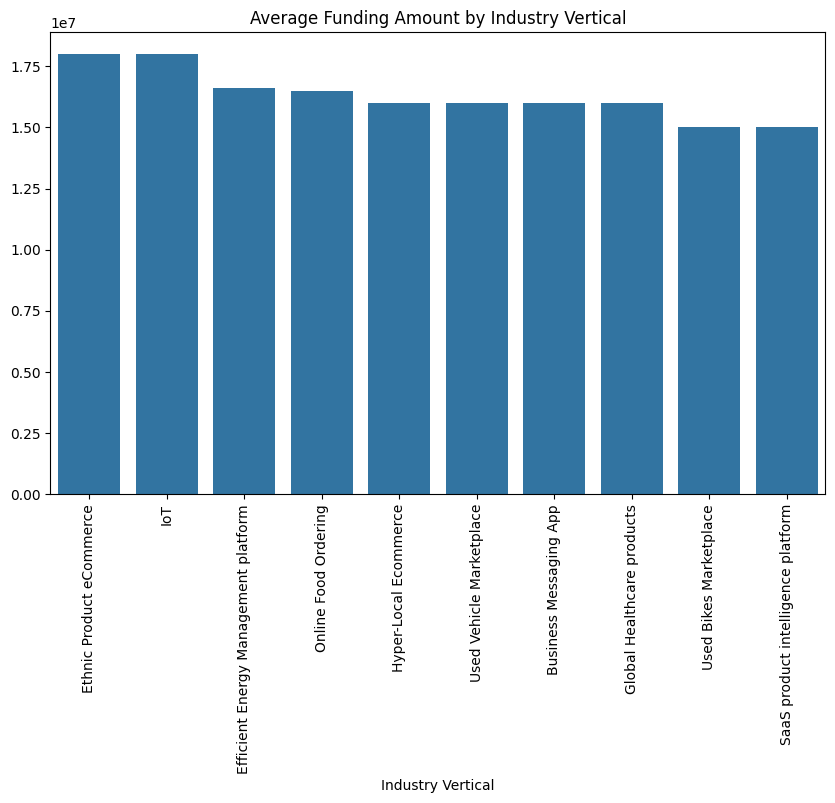

In [ ]:
# Group by -
average_funding_amount = df.groupby('industry_vertical')['amount_in_usd'].mean().round(2).sort_values(ascending=False).head(10).round(2)
# print(average_funding_amount)

# Plotting a bar chart -
plt.figure(figsize=(10,6))
sns.barplot(x=average_funding_amount.index, y=average_funding_amount.values)
plt.title("Average Funding Amount by Industry Vertical")
plt.xlabel("Industry Vertical")
plt.xticks(rotation=90);

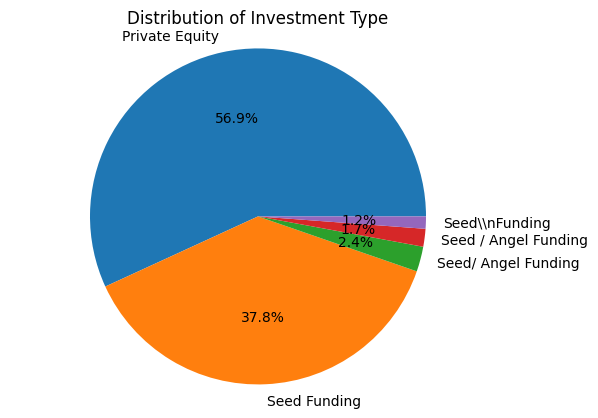

In [ ]:
# Displaying the distribution of different investment type (Top 5) -

distribution_investment_type = df['investmentntype'].value_counts().sort_values(ascending=False).head(5)
# print(distribution_investment_type)

plt.pie(distribution_investment_type.values, labels=distribution_investment_type.index, autopct='%1.1f%%')
plt.title("Distribution of Investment Type")
plt.axis('equal');

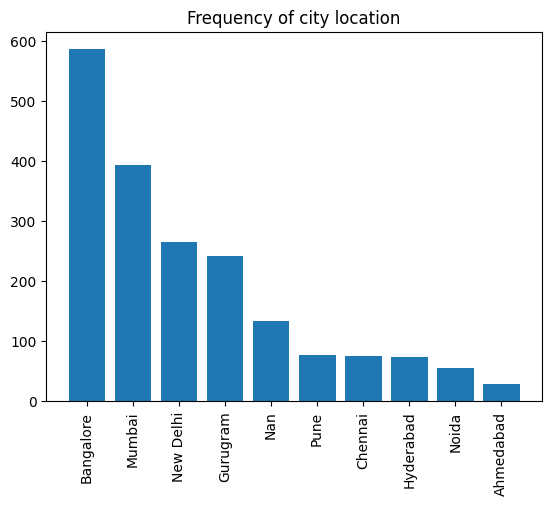

In [ ]:
# Checking the frequency of City -

city_Frequency = df['city__location'].value_counts().head(10).round()
# print(city_Frequency)

plt.bar(city_Frequency.index,city_Frequency.values)
plt.title("Frequency of city location")
plt.xticks(rotation=90);

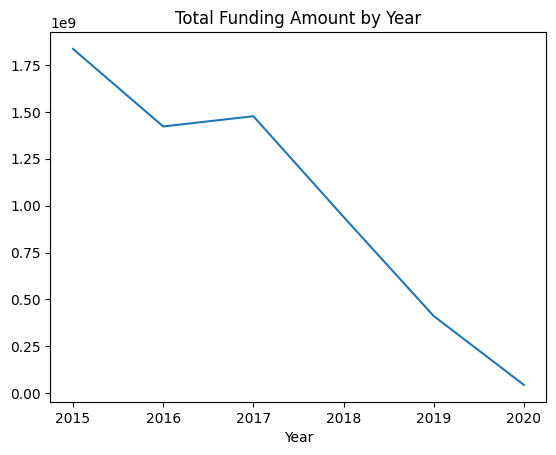

In [ ]:
# Extracting the Year from the date column -
df['Year'] = df['date_dd/mm/yyyy'].dt.year

# Analyzing the trend of startup funding over the years -
startup = df.groupby('Year')['amount_in_usd'].sum().round(2)
# print(startup)

plt.plot(startup.index, startup.values)
plt.title("Total Funding Amount by Year")
plt.xlabel("Year");

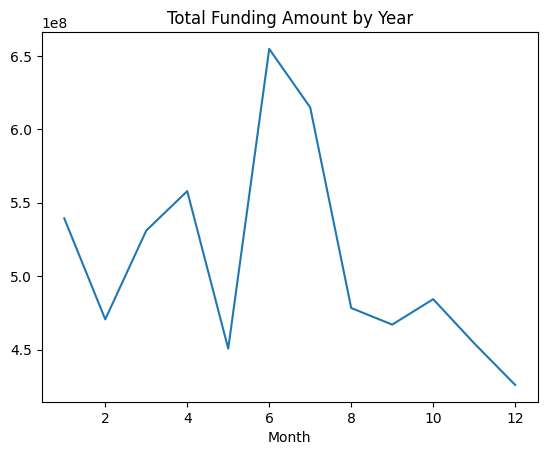

In [ ]:
# Extracting the Year from the date column -
df['month'] = df['date_dd/mm/yyyy'].dt.month

# Analyzing the trend of startup funding over the years -
start_= df.groupby('month')['amount_in_usd'].sum().round(2)
# print(startup)

plt.plot(start_.index, start_.values)
plt.title("Total Funding Amount by Year")
plt.xlabel("Month");

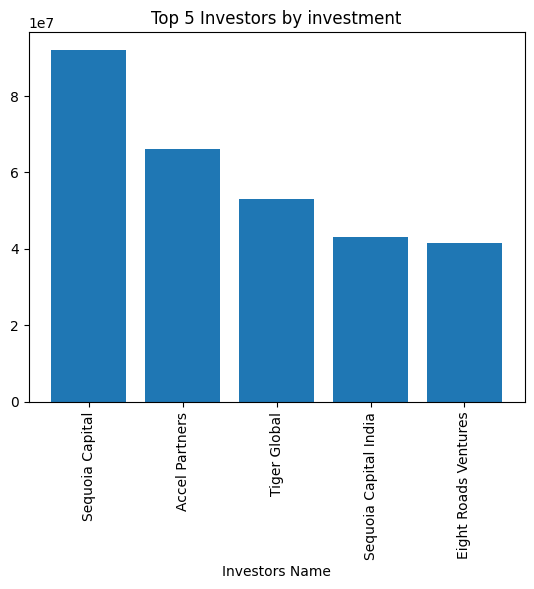

In [ ]:
# Total amount a investor had invested (Top 5 investors)-
total_amount = df.groupby('investors_name')['amount_in_usd'].sum().sort_values(ascending=False).head(5).round(2)
# print(total_amount)

# Plotting a bar chart
plt.bar(total_amount.index,total_amount.values)
plt.title("Top 5 Investors by investment")
plt.xlabel("Investors Name")
plt.xticks(rotation=90);

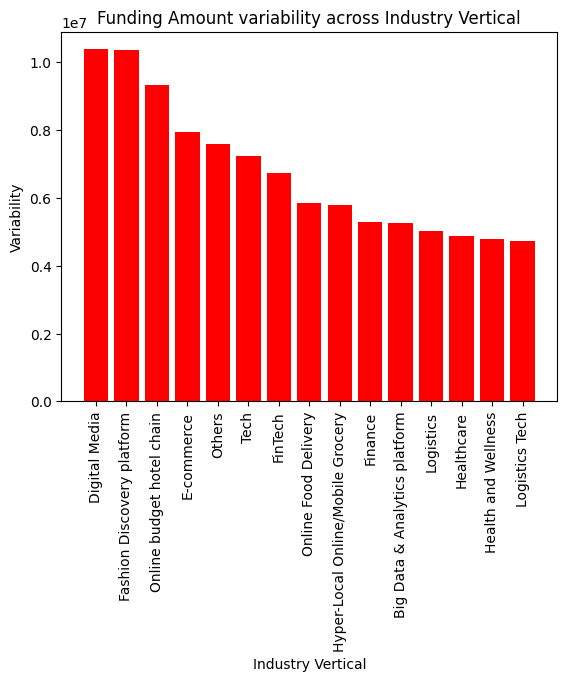

In [ ]:
# funding amount variability across various Industry Verticals -

variability = df.groupby('industry_vertical')['amount_in_usd'].std().sort_values(ascending=False).head(15).round(2)
# print(variability)

# Plotting a bar chart
plt.bar(variability.index, variability.values , color='red')
plt.title("Funding Amount variability across Industry Vertical")
plt.xlabel("Industry Vertical")
plt.xticks(rotation=90)
plt.ylabel("Variability")
plt.show()

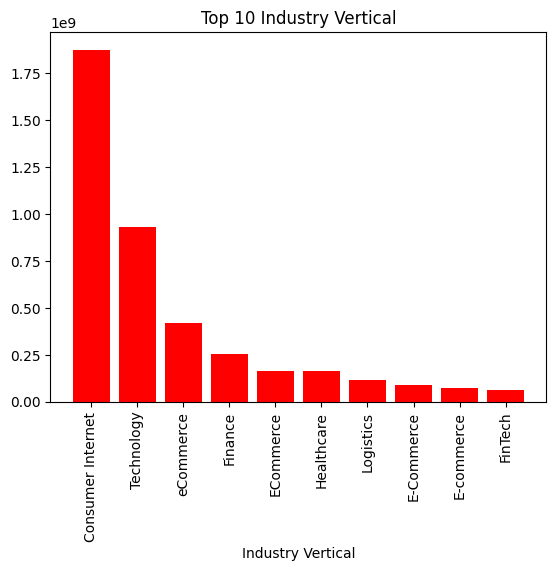

In [ ]:
most_funded_industry = df.groupby('industry_vertical')['amount_in_usd'].sum().sort_values(ascending=False).head(10).round(2)
# print(most_funded_industry)

plt.bar(most_funded_industry.index, most_funded_industry.values , color='red')
plt.title("Top 10 Industry Vertical")
plt.xlabel("Industry Vertical")
plt.xticks(rotation=90);

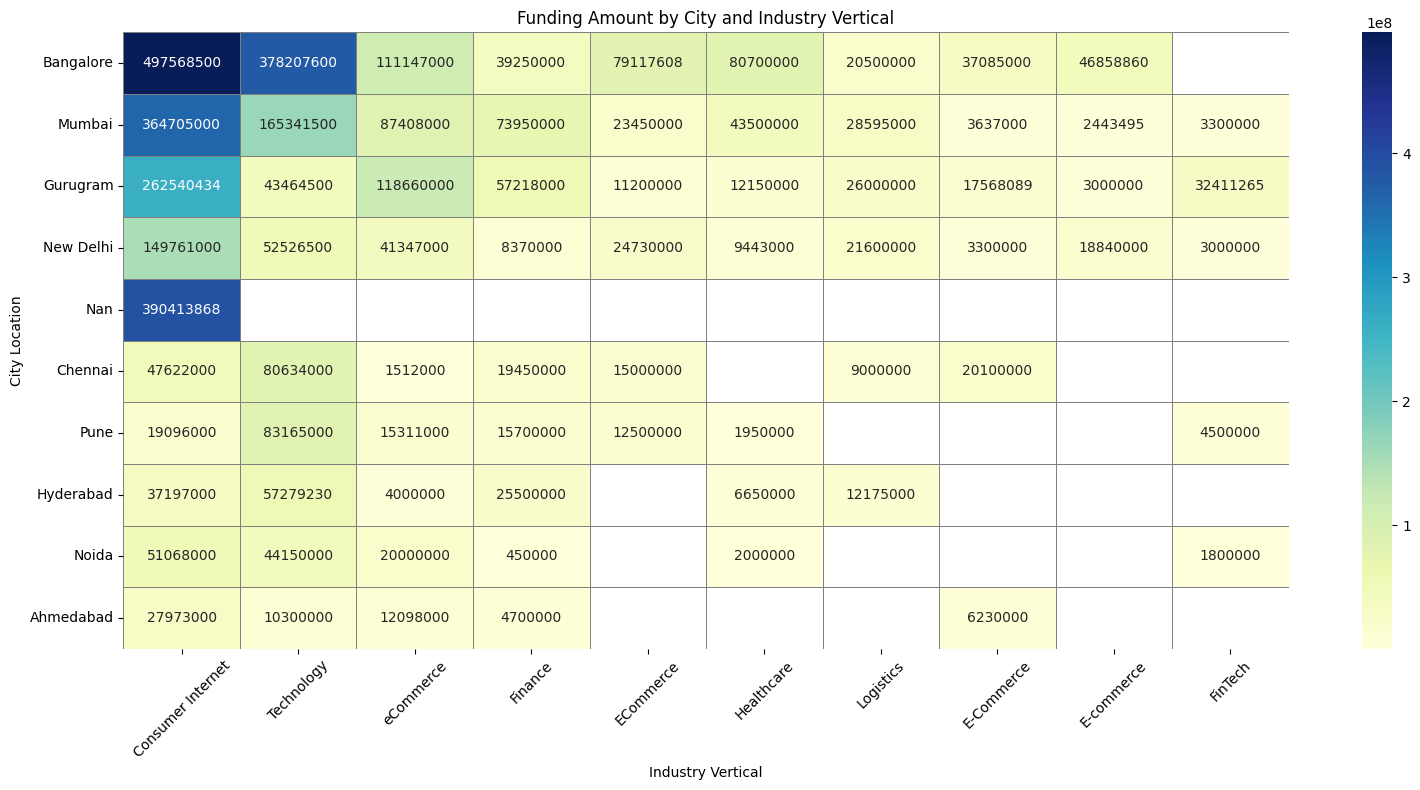

In [ ]:
# Funding amount across City Loation and Industry Vertical -
funding = df.pivot_table(values='amount_in_usd',index='city__location',columns='industry_vertical',aggfunc='sum')

# finding the top 10 cities and top 10 industries -
top_cities = funding.sum(axis=1).sort_values(ascending=False).head(10).index
top_industries = funding.sum(axis=0).sort_values(ascending=False).head(10).index

filtered_data = funding.loc[top_cities, top_industries]

# Plotting a heatmap for this -
plt.figure(figsize=(16, 8))
sns.heatmap(filtered_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Funding Amount by City and Industry Vertical')
plt.xlabel('Industry Vertical')
plt.ylabel('City Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()